#****Linear Regression 실습****

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 모듈 임포트

In [ ]:
x = [1, 2, 4, 6, 7]
y = [30, 50, 70, 80, 90]


# 공부 시간과 점수 데이터

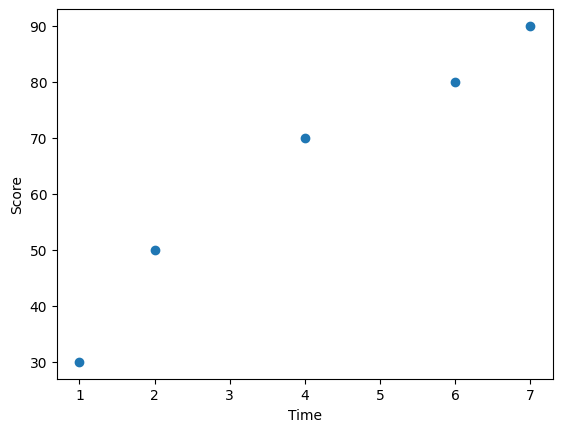

In [ ]:
plt.xlabel("Time")
plt.ylabel("Score")
plt.scatter(x, y)
plt.show()
#산점도 출력 함수



# 1.   최소 제곱법 구현



<img src = "https://drive.google.com/uc?id=1FhId4kx1QyjGJJkQN9HB8D8d8cEe0xwc" height = 300 width = 420>


> *위 공식을 바탕으로 최소 제곱법 계산 함수를 구현하시오.*

In [ ]:
# 여기부터 자유롭게 작성(계산된 a, b 값은 각각의 변수에 할당할것)
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = 0
denominator = 0

for i in range(len(x)):
    numerator = (x[i] - x_mean) * (y[i] - y_mean)
    denominator = (x[i] - x_mean) ** 2

a = numerator / denominator
b = y_mean - (x_mean * a)

print(a, b)

8.666666666666666 29.333333333333336




> *구현이 완료 되었다면 아래의 셀을 실행하여 그래프를 확인 해보시오*



<function matplotlib.pyplot.show(close=None, block=None)>

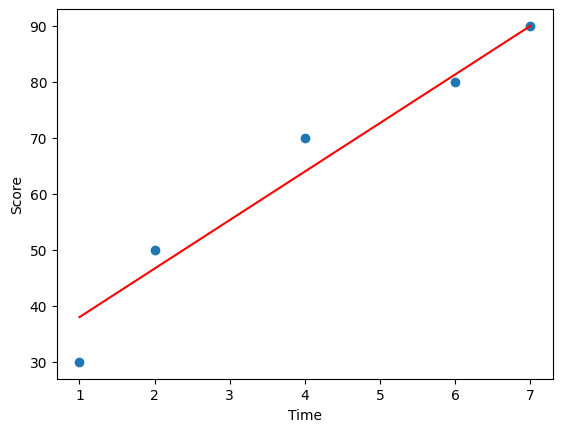

In [ ]:
#  실행하면 계산한 a, b를 바탕으로 그래프 출력
y_cal = []
for i in range(len(x)):
    y_cal.append(a * x[i] + b)

plt.xlabel("Time")
plt.ylabel("Score")
plt.scatter(x, y)
plt.plot(x, y_cal, color = 'red')

plt.show

# 2. MSE(Mean Squared Error) 함수 구현

<img src = "https://drive.google.com/uc?id=1y4KZraKF6oz6xF5-LAhsfpHcDxrRe8cO" height = 140 width = 500>


> *위 공식을 바탕으로 MSE를 구하는 함수를 구현하시오.*

In [ ]:
# 여기부터 자유롭게 작성
def mse(y, t):
    return np.sum((y-t) ** 2) / len(t)

In [ ]:
#mse 계산

ex_grad = [[8.6, 29.3], [5.1 ,29.3], [8.6, 25.1], [5.1, 25.1]]

x_temp = np.array(x)
y_temp = np.array(y)

temp = []

for i in ex_grad:
    pred_temp = x_temp * i[0] + i[1]
    temp.append(pred_temp)
    mse = np.sum((pred_temp - y_temp) ** 2) / len(y_temp)
    print("MSE:", mse)


MSE: 23.081999999999987
MSE: 314.14199999999994
MSE: 43.24200000000003
MSE: 451.90200000000004


> *그래프에서 점들과 어긋날수록 즉, 오차가 커질수록 MSE가 증가하는 것을 확인 가능*

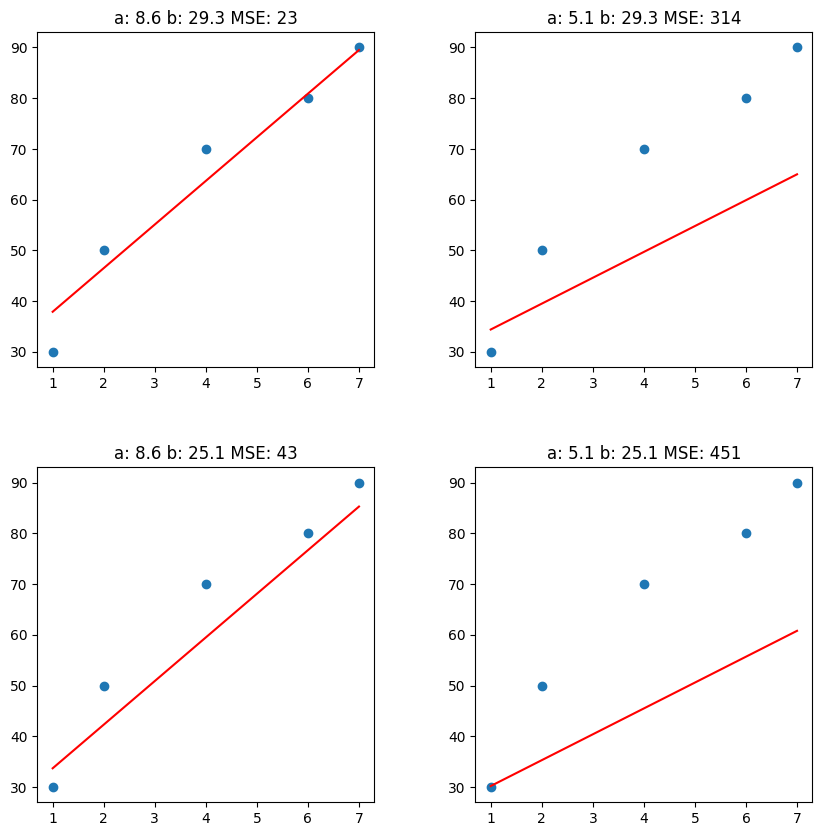

In [ ]:
#mse 비교를 위한 그래프 출력

f, axes = plt.subplots(2, 2)

f.set_size_inches((10, 10))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


axes[0][0].scatter(x, y)
axes[0][1].scatter(x, y)
axes[1][0].scatter(x, y)
axes[1][1].scatter(x, y)

axes[0][0].plot(x_temp, temp[0], color = 'red')
axes[0][1].plot(x_temp, temp[1], color = 'red')
axes[1][0].plot(x_temp, temp[2], color = 'red')
axes[1][1].plot(x_temp, temp[3], color = 'red')

axes[0][0].set_title('a: 8.6 b: 29.3 MSE: 23')
axes[0][1].set_title('a: 5.1 b: 29.3 MSE: 314')
axes[1][0].set_title('a: 8.6 b: 25.1 MSE: 43')
axes[1][1].set_title('a: 5.1 b: 25.1 MSE: 451')

plt.show()

# 3. Linear Regression 구현

<img src = "https://drive.google.com/uc?id=1YxRl55VIM3gVKXy3Kfgg8Kjsg8NDbHG5" height = 220 width = 500>

> *학습한 내용과 같이 기울기를 이용하면 오차가 가장 작아지는 부분을 구할 수 있음을 확인 가능*

In [ ]:
a = 0
b = 0

epochs = 4000
lr = 0.01

x_train = np.array(x)
y_train = np.array(y)

n = len(x_train)

for i in range(epochs):
    y_pred = x_train * a + b
    mse = np.sum((y_pred-y_train) ** 2) / n
    grad_a = np.sum((a * x_train + b - y_train) * x_train) * (2 / n)
    grad_b = np.sum((a * x_train + b - y_train)) * (2 / n)

    a -= lr * grad_a # a, b를 기울기 방향에 따라 업데이트
    b -= lr * grad_b

    if i % 100 == 0:
        print("학습회차 ({:10d}/{:10d}) MSE: {:10f}, a: {:10f}, b: {:10f}".format(i, epochs, mse, a, b))

print('a: {:10f}'.format(a))
print('b: {:10f}'.format(b))
print('result : ')
result = list(map(int, x_train * a + b))
print(result)

학습회차 (         0/      4000) MSE: 4560.000000, a:   6.080000, b:   1.280000
학습회차 (       100/      4000) MSE:  77.583859, a:  12.116545, b:  11.953121
학습회차 (       200/      4000) MSE:  42.851772, a:  11.026031, b:  17.668299
학습회차 (       300/      4000) MSE:  29.409858, a:  10.347614, b:  21.223752
학습회차 (       400/      4000) MSE:  24.207607, a:   9.925566, b:  23.435624
학습회차 (       500/      4000) MSE:  22.194246, a:   9.663007, b:  24.811645
학습회차 (       600/      4000) MSE:  21.415041, a:   9.499668, b:  25.667678
학습회차 (       700/      4000) MSE:  21.113476, a:   9.398053, b:  26.200222
학습회차 (       800/      4000) MSE:  20.996764, a:   9.334838, b:  26.531521
학습회차 (       900/      4000) MSE:  20.951595, a:   9.295511, b:  26.737625
학습회차 (      1000/      4000) MSE:  20.934114, a:   9.271045, b:  26.865843
학습회차 (      1100/      4000) MSE:  20.927348, a:   9.255825, b:  26.945609
학습회차 (      1200/      4000) MSE:  20.924730, a:   9.246357, b:  26.995232
학습회차 (      1300/      4

> *반복 학습 결과 a,b가 최소 제곱법으로 구한 값과 비슷하게 나오고 그래프 또한 최소 제곱법으로 구한 그래프와 거의 유사함*

<function matplotlib.pyplot.show(close=None, block=None)>

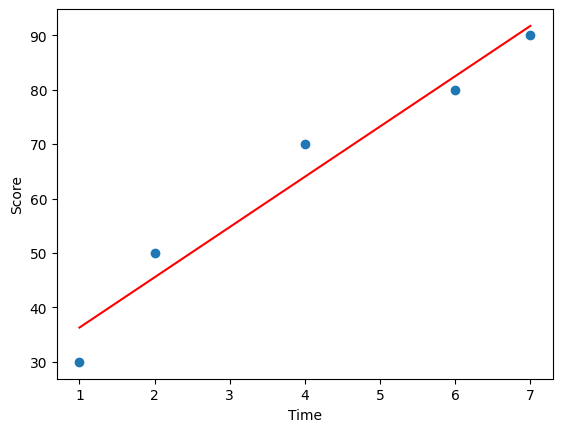

In [ ]:
y_cal = []
for i in range(len(x)):
    y_cal.append(a * x[i] + b)

plt.xlabel("Time")
plt.ylabel("Score")
plt.scatter(x, y)
plt.plot(x, y_cal, color = 'red')

plt.show

# 3. Scikit-learn 활용

In [ ]:
import sklearn
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 데이터셋 로드
diabetes = load_diabetes()

In [ ]:
# 훈련 데이터셋과 테스트 데이터셋 분리

train_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
train_df['target'] = diabetes.target

x_data = train_df.loc[:,['bmi', 's5']]
y_data = train_df.loc[:,'target']
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

train_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# 모델 훈련
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 테스트 셋으로 테스트 수행
pred = lr.predict(X_test)

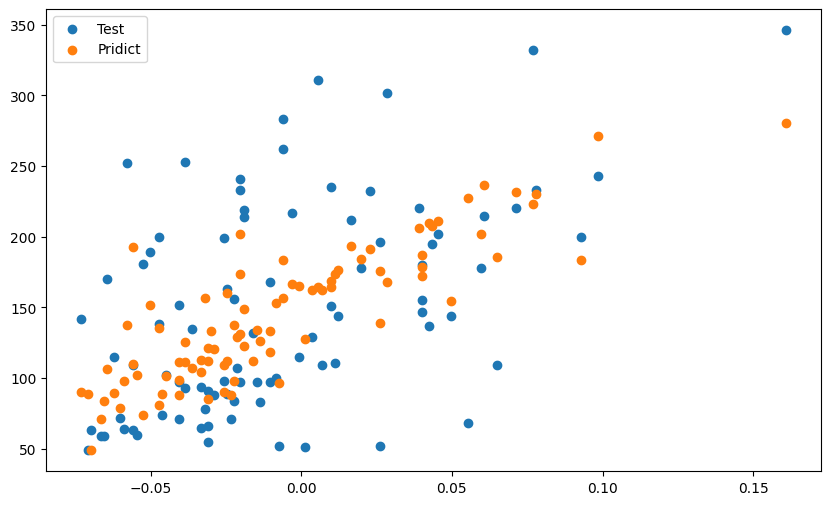

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test['bmi'], Y_test, label = 'Test')
plt.scatter(X_test['bmi'], pred, label = 'Pridict')
plt.legend()
plt.show()

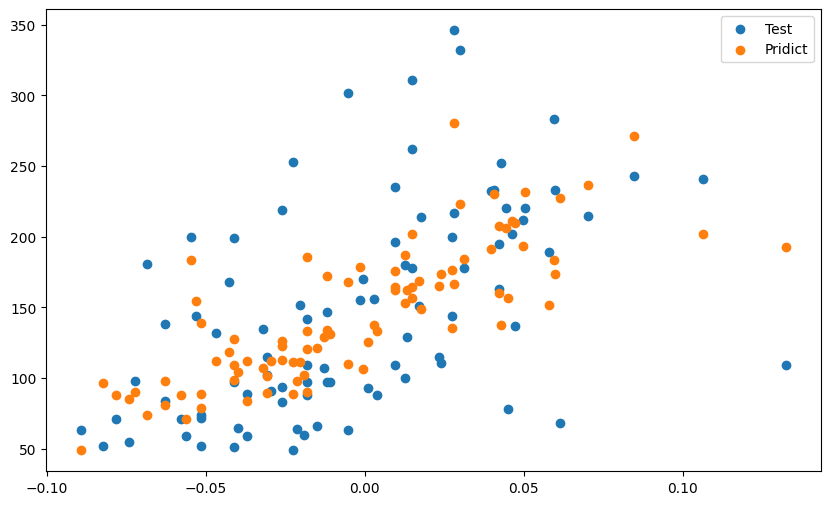

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(X_test['s5'], Y_test, label = 'Test')
plt.scatter(X_test['s5'], pred, label = 'Pridict')
plt.legend()
plt.show()

In [ ]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)

print("train MSE :", train_mse)
print("test MSE :", test_mse)

train MSE : 3194.1283783605654
test MSE : 3254.1047720984925
